In [11]:
import os
file_names=[]
directory = './label_point'  # 将目录路径替换为你想要列出文件的目录

# 使用os模块列出目录下的所有文件名
for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):  # 确保是文件而不是子目录
        file_names.append(filename)

print(len(file_names))  # 输出列出的文件名
print(file_names[0:2])

525
['1_2_826_0_1_3680043_2_966_20151014152551_416_748.txt', '1_2_826_0_1_3680043_2_966_20151014152623_416_753.txt']


In [12]:
# 创建一个新的文件来存储合并后的内容
with open('merged_file.txt', 'w', encoding='utf-8') as merged_file:
    # 遍历每个文件并将内容写入到合并后的文件中
    i=0
    for file_name in file_names:
    
        with open('label_point/'+file_name, 'r', encoding='utf-8') as file:
            merged_file.write(file_names[i][:-4]+'.jpg'+' '+file.read() + '\n')  # 在每个文件内容之间添加换行符或其他分隔符
            i=i+1
            

In [13]:
# 打开文件进行读取和写入
file_path = 'merged_file.txt'  # 将文件路径替换为你的文件路径
temp_file_path = 'temp_file.txt'  # 创建一个临时文件来存储修改后的内容

with open(file_path, 'r', encoding='utf-8') as file, open(temp_file_path, 'w', encoding='utf-8') as temp_file:
    for line in file:
        # 移动行中的'0'到行末尾
        line = line.strip().split()
        if '0' in line:
            line.remove('0')
            line.append('0')
        elif '1' in line:
            line.remove('1')
            line.append('1')
        
        # 将修改后的行写入临时文件
        temp_file.write(' '.join(line) + '\n')

# 将临时文件替换为原始文件
os.remove(file_path)
os.rename(temp_file_path, file_path)

In [14]:
import os
import shutil

# 要處理的目錄路徑
root_folder = 'NO_LABEL\PADDING'

# 新的目標檔案夾路徑
target_folder = 'merged_image'

# 創建目標檔案夾
os.makedirs(target_folder, exist_ok=True)

# 遍歷所有子檔案夾與檔案
for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in filenames:
        # 源檔案路徑
        source_path = os.path.join(foldername, filename)
        # 目標檔案路徑
        target_path = os.path.join(target_folder, filename)
        # 複製檔案到目標檔案夾
        shutil.copy(source_path, target_path)


In [15]:
def list_files_in_folder(folder_path):
    files_list = []
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            files_list.append(file_name)
    return files_list

# 要列出檔案的目錄路徑
files_in_directory  = './merged_image'

# 取得該目錄內所有檔案名稱的清單
extract_images_list = list_files_in_folder(files_in_directory )
extract_images_list[0:3]

['1_2_826_0_1_3680043_2_966_20150703111010_144_22.jpg',
 '1_2_826_0_1_3680043_2_966_20150703111131_144_27.jpg',
 '1_2_826_0_1_3680043_2_966_20150703111222_144_32.jpg']

In [16]:
file_to_find =[file[:-4]+'.jpg' for file in file_names]
file_to_find[0:3]


['1_2_826_0_1_3680043_2_966_20151014152551_416_748.jpg',
 '1_2_826_0_1_3680043_2_966_20151014152623_416_753.jpg',
 '1_2_826_0_1_3680043_2_966_20151014152744_416_763.jpg']

In [17]:
e=0
n=0
for f in file_to_find:
    if f in extract_images_list:
        e=e+1
    else:
        n=n+1
        print(f)
print('exists:',e,"None:",n)

exists: 525 None: 0


In [18]:
from PIL import Image

# 資料夾路徑
folder_path = 'merged_image'  # 記得替換成你的資料夾路徑

# 取得資料夾中所有的檔案
file_list = os.listdir(folder_path)

# 迭代處理所有.jpg檔案
for file_name in file_list:
    if file_name.endswith('.jpg'):
        file_path = os.path.join(folder_path, file_name)
        
        # 開啟圖片
        img = Image.open(file_path)
        
        # 調整大小至400x400
        img_resized = img.resize((400, 400), Image.LANCZOS)
        
        # 保存調整大小後的圖片（這裡會覆蓋原始圖片，如需保留原始，可修改檔名）
        img_resized.save(file_path)


In [19]:
width=395
height=380
file_path = 'merged_file.txt'  # 修改成你的檔案路徑

# 讀取檔案
with open(file_path, 'r') as file:
    lines = file.readlines()

# 逐行處理
processed_lines = []
for line in lines:
    # 在這裡可以對每一行做你需要的處理
    processed_line = line
    data=processed_line.split()
    if data!=[] :
        if len(data)==6:
            x=float(data[1])
            y=float(data[2])
            w=float(data[3])
            h=float(data[4])
            
            
           
            
            new_data=[]
            new_data.append(data[0])
            new_data.append(data[1])
            new_data.append(data[2])
            new_data.append(data[3])
            new_data.append(data[4])
            new_data.append(data[5])           

            new_line=' '.join(new_data)
            processed_lines.append(new_line)

# 將處理後的資料寫回檔案
with open(file_path, 'w') as file:
    file.write('\n'.join(processed_lines))

In [20]:
os.rename('merged_file.txt', 'train.txt')

In [21]:
import random

train_file = 'train.txt'
test_file = 'test.txt'
lines_to_remove = 100

# 開啟 train.txt 並讀取所有行
with open(train_file, 'r') as train:
    lines = train.readlines()

# 隨機挑選要移除的行數
random_lines = random.sample(lines, lines_to_remove)

# 從原始的 train.txt 中移除選擇的行
updated_lines = [line for line in lines if line not in random_lines]

# 將移除的行寫入 test.txt
with open(test_file, 'w') as test:
    test.writelines(random_lines)

# 更新 train.txt，移除已選擇的行
with open(train_file, 'w') as train:
    train.writelines(updated_lines)


In [22]:
import tensorflow as tf
import numpy as np
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Select GPU number 1
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [23]:
# common params
IMAGE_SIZE = 400
BATCH_SIZE = 8
NUM_CLASSES = 2
MAX_OBJECTS_PER_IMAGE = 1

# dataset params
DATA_PATH = './train.txt'
IMAGE_DIR = './merged_image'

# model params
CELL_SIZE = 7
BOXES_PER_CELL = 2
OBJECT_SCALE = 1
NOOBJECT_SCALE = 0.5
CLASS_SCALE = 1
COORD_SCALE = 5

# training params
LEARNING_RATE = 1e-4
EPOCHS = 5

In [24]:
class DatasetGenerator:
    """
    creates an input pipeline.
    - Reshapes images into 448 x 448
    - converts [0 1] to [-1 1]
    - shuffles the input
    - builds batches
    """

    def __init__(self):
        self.image_names = []
        self.record_list = []
        self.object_num_list = []
        # filling the record_list
        input_file = open(DATA_PATH, 'r')

        for line in input_file:
            line = line.strip()
            ss = line.split(' ')
            self.image_names.append(os.path.join(IMAGE_DIR,ss[0]))

            self.record_list.append([float(num) for num in ss[1:]])

            self.object_num_list.append(min(len(self.record_list[-1])//5, 
                                            MAX_OBJECTS_PER_IMAGE))
            if len(self.record_list[-1]) < MAX_OBJECTS_PER_IMAGE*5:
                # if there are objects less than MAX_OBJECTS_PER_IMAGE, pad the list
                self.record_list[-1] = self.record_list[-1] +\
                [0., 0., 0., 0., 0.]*\
                (MAX_OBJECTS_PER_IMAGE-len(self.record_list[-1])//5)
                
            elif len(self.record_list[-1]) > MAX_OBJECTS_PER_IMAGE*5:
               # if there are objects more than MAX_OBJECTS_PER_IMAGE, crop the list
                self.record_list[-1] = self.record_list[-1][:MAX_OBJECTS_PER_IMAGE*5]

    def _data_preprocess(self, image_name, raw_labels, object_num):
        image_file = tf.io.read_file(image_name)
        image = tf.io.decode_jpeg(image_file, channels=3)

        h = tf.shape(image)[0]
        w = tf.shape(image)[1]

        width_ratio  = IMAGE_SIZE * 1.0 / tf.cast(w, tf.float32) 
        height_ratio = IMAGE_SIZE * 1.0 / tf.cast(h, tf.float32) 

        image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = (image/255) * 2 - 1

        raw_labels = tf.cast(tf.reshape(raw_labels, [-1, 5]), tf.float32)

        xcenter = raw_labels[:, 0]
        ycenter = raw_labels[:, 1]
        box_w = raw_labels[:, 2]
        box_h = raw_labels[:, 3]
        class_num = raw_labels[:, 4]

        

        labels = tf.stack([xcenter, ycenter, box_w, box_h, class_num], axis=1)

        return image, labels, tf.cast(object_num, tf.int32)

    def generate(self):
        dataset = tf.data.Dataset.from_tensor_slices((self.image_names, 
                                                      np.array(self.record_list), 
                                                      np.array(self.object_num_list)))
        dataset = dataset.shuffle(100000)
        dataset = dataset.map(self._data_preprocess, 
                              num_parallel_calls = tf.data.experimental.AUTOTUNE)
        dataset = dataset.batch(BATCH_SIZE)
        dataset = dataset.prefetch(buffer_size=200)

        return dataset

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

def conv_leaky_relu(inputs, filters, size, stride):
    x = layers.Conv2D(filters, size, stride, padding="same",
                      kernel_initializer=tf.keras.initializers.TruncatedNormal())(inputs)
    x = layers.LeakyReLU(0.1)(x)

    return x

In [26]:
img_inputs = keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
x = conv_leaky_relu(img_inputs, 64, 7, 2)
x = layers.MaxPool2D()(x)
x = conv_leaky_relu(x, 192, 3, 1)
x = layers.MaxPool2D()(x)
x = conv_leaky_relu(x, 128, 1, 1)
x = conv_leaky_relu(x, 256, 3, 1)
x = conv_leaky_relu(x, 256, 1, 1)
x = conv_leaky_relu(x, 512, 3, 1)
x = layers.MaxPool2D()(x)
x = conv_leaky_relu(x, 256, 1, 1)
x = conv_leaky_relu(x, 512, 3, 1)
x = conv_leaky_relu(x, 256, 1, 1)
x = conv_leaky_relu(x, 512, 3, 1)
x = conv_leaky_relu(x, 256, 1, 1)
x = conv_leaky_relu(x, 512, 3, 1)
x = conv_leaky_relu(x, 256, 1, 1)
x = conv_leaky_relu(x, 512, 3, 1)
x = conv_leaky_relu(x, 512, 1, 1)
x = conv_leaky_relu(x, 1024, 3, 1)
x = layers.MaxPool2D()(x)
x = conv_leaky_relu(x, 512, 1, 1)
x = conv_leaky_relu(x, 1024, 3, 1)
x = conv_leaky_relu(x, 512, 1, 1)
x = conv_leaky_relu(x, 1024, 3, 1)
x = conv_leaky_relu(x, 1024, 3, 1)
x = conv_leaky_relu(x, 1024, 3, 2)
x = conv_leaky_relu(x, 1024, 3, 1)
x = conv_leaky_relu(x, 1024, 3, 1)
x = layers.Flatten()(x)
x = layers.Dense(4096, 
                 kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.01))(x)
x = layers.LeakyReLU(0.1)(x)
outputs = layers.Dense(588, 
                       kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.01))(x)

YOLO = keras.Model(inputs=img_inputs, outputs=outputs, name="YOLO")

In [27]:
YOLO.summary()

Model: "YOLO"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 64)      9472      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 192)     110784    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100, 100, 192)     0         
                                                              

In [28]:
# base boxes (for loss calculation)
base_boxes = np.zeros([CELL_SIZE, CELL_SIZE, 4])

# initializtion for each cell
for y in range(CELL_SIZE):
    for x in range(CELL_SIZE):
        base_boxes[y, x, :] = [IMAGE_SIZE / CELL_SIZE * x, 
                               IMAGE_SIZE / CELL_SIZE * y, 0, 0]

base_boxes = np.resize(base_boxes, [CELL_SIZE, CELL_SIZE, 1, 4])
base_boxes = np.tile(base_boxes, [1, 1, BOXES_PER_CELL, 1])

In [29]:
def iou(boxes1, boxes2):
    """calculate ious
    Args:
      boxes1: 4-D tensor [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL, 4]  ====> (x_center, y_center, w, h)
      boxes2: 1-D tensor [4] ===> (x_center, y_center, w, h)

    Return:
      iou: 3-D tensor [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL]
      ====> iou score for each cell
    """

    #boxes1 : [4(xmin, ymin, xmax, ymax), cell_size, cell_size, boxes_per_cell]
    boxes1 = tf.stack([boxes1[:, :, :, 0] - boxes1[:, :, :, 2] / 2, boxes1[:, :, :, 1] - boxes1[:, :, :, 3] / 2,
                      boxes1[:, :, :, 0] + boxes1[:, :, :, 2] / 2, boxes1[:, :, :, 1] + boxes1[:, :, :, 3] / 2])

    #boxes1 : [cell_size, cell_size, boxes_per_cell, 4(xmin, ymin, xmax, ymax)]
    boxes1 = tf.transpose(boxes1, [1, 2, 3, 0])

    boxes2 =  tf.stack([boxes2[0] - boxes2[2] / 2, boxes2[1] - boxes2[3] / 2,
                      boxes2[0] + boxes2[2] / 2, boxes2[1] + boxes2[3] / 2])

    #calculate the left up point of boxes' overlap area
    lu = tf.maximum(boxes1[:, :, :, 0:2], boxes2[0:2])
    #calculate the right down point of boxes overlap area
    rd = tf.minimum(boxes1[:, :, :, 2:], boxes2[2:])

    #intersection
    intersection = rd - lu 

    #the size of the intersection area
    inter_square = intersection[:, :, :, 0] * intersection[:, :, :, 1]

    mask = tf.cast(intersection[:, :, :, 0] > 0, tf.float32) * tf.cast(intersection[:, :, :, 1] > 0, tf.float32)

    #if intersection is negative, then the boxes don't overlap
    inter_square = mask * inter_square

    #calculate the boxs1 square and boxs2 square
    square1 = (boxes1[:, :, :, 2] - boxes1[:, :, :, 0]) * (boxes1[:, :, :, 3] - boxes1[:, :, :, 1])
    square2 = (boxes2[2] - boxes2[0]) * (boxes2[3] - boxes2[1])

    return inter_square/(square1 + square2 - inter_square + 1e-6)

def losses_calculation(predict, label):
    """
    calculate loss
    Args:
      predict: 3-D tensor [cell_size, cell_size, num_classes + 5 * boxes_per_cell]
      label : [1, 5]  (x_center, y_center, w, h, class)
    """
    label = tf.reshape(label, [-1])

    #Step A. calculate objects tensor [CELL_SIZE, CELL_SIZE]
    #turn pixel position into cell position (corner)
    min_x = (label[0] - label[2] / 2) / (IMAGE_SIZE / CELL_SIZE)
    max_x = (label[0] + label[2] / 2) / (IMAGE_SIZE / CELL_SIZE)

    min_y = (label[1] - label[3] / 2) / (IMAGE_SIZE / CELL_SIZE)
    max_y = (label[1] + label[3] / 2) / (IMAGE_SIZE / CELL_SIZE)

    min_x = tf.floor(min_x)
    min_y = tf.floor(min_y)

    max_x = tf.minimum(tf.math.ceil(max_x), CELL_SIZE)
    max_y = tf.minimum(tf.math.ceil(max_y), CELL_SIZE)
    
    #calculate mask of object with cells
    onset = tf.cast(tf.stack([max_y - min_y, max_x - min_x]), dtype=tf.int32)
    object_mask = tf.ones(onset, tf.float32)

    offset = tf.cast(tf.stack([min_y, CELL_SIZE - max_y, min_x, CELL_SIZE - max_x]), tf.int32)
    offset = tf.reshape(offset, (2, 2))
    object_mask = tf.pad(object_mask, offset, "CONSTANT")

    #Step B. calculate the coordination of object center and the corresponding mask
    #turn pixel position into cell position (center)
    center_x = label[0] / (IMAGE_SIZE / CELL_SIZE)
    center_x = tf.floor(center_x)

    center_y = label[1] / (IMAGE_SIZE / CELL_SIZE)
    center_y = tf.floor(center_y)

    response = tf.ones([1, 1], tf.float32)

    #calculate the coordination of object center with cells
    objects_center_coord = tf.cast(tf.stack([center_y, CELL_SIZE - center_y - 1, 
                             center_x, CELL_SIZE - center_x - 1]), 
                             tf.int32)
    objects_center_coord = tf.reshape(objects_center_coord, (2, 2))

    #make mask
    response = tf.pad(response, objects_center_coord, "CONSTANT")

    #Step C. calculate iou_predict_truth [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL]
    predict_boxes = predict[:, :, NUM_CLASSES + BOXES_PER_CELL:]

    predict_boxes = tf.reshape(predict_boxes, [CELL_SIZE, 
                                               CELL_SIZE, 
                                               BOXES_PER_CELL, 4])
    #cell position to pixel position
    predict_boxes = predict_boxes * [IMAGE_SIZE / CELL_SIZE, 
                                     IMAGE_SIZE / CELL_SIZE, 
                                     IMAGE_SIZE, IMAGE_SIZE]

    #if there's no predict_box in that cell, then the base_boxes will be calcuated with label and got iou equals 0
    predict_boxes = base_boxes + predict_boxes

    iou_predict_truth = iou(predict_boxes, label[0:4])

    #calculate C tensor [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL]
    C = iou_predict_truth * tf.reshape(response, [CELL_SIZE, CELL_SIZE, 1])

    #calculate I tensor [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL]
    I = iou_predict_truth * tf.reshape(response, [CELL_SIZE, CELL_SIZE, 1])

    max_I = tf.reduce_max(I, 2, keepdims=True)

    #replace large iou scores with response (object center) value
    I = tf.cast((I >= max_I), tf.float32) * tf.reshape(response, (CELL_SIZE, CELL_SIZE, 1))

    #calculate no_I tensor [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL]
    no_I = tf.ones_like(I, dtype=tf.float32) - I

    p_C = predict[:, :, NUM_CLASSES:NUM_CLASSES + BOXES_PER_CELL]

    #calculate truth x, y, sqrt_w, sqrt_h 0-D
    x = label[0]
    y = label[1]

    sqrt_w = tf.sqrt(tf.abs(label[2]))
    sqrt_h = tf.sqrt(tf.abs(label[3]))

    #calculate predict p_x, p_y, p_sqrt_w, p_sqrt_h 3-D [CELL_SIZE, CELL_SIZE, BOXES_PER_CELL]
    p_x = predict_boxes[:, :, :, 0]
    p_y = predict_boxes[:, :, :, 1]

    p_sqrt_w = tf.sqrt(tf.minimum(IMAGE_SIZE * 1.0, tf.maximum(0.0, predict_boxes[:, :, :, 2])))
    p_sqrt_h = tf.sqrt(tf.minimum(IMAGE_SIZE * 1.0, tf.maximum(0.0, predict_boxes[:, :, :, 3])))

    #calculate ground truth p 1-D tensor [NUM_CLASSES]
    P = tf.one_hot(tf.cast(label[4], tf.int32), NUM_CLASSES, dtype=tf.float32)

    #calculate predicted p_P 3-D tensor [CELL_SIZE, CELL_SIZE, NUM_CLASSES]
    p_P = predict[:, :, 0:NUM_CLASSES]

    #class_loss
    class_loss = tf.nn.l2_loss(tf.reshape(object_mask, (CELL_SIZE, CELL_SIZE, 1)) * (p_P - P)) * CLASS_SCALE

    #object_loss
    object_loss = tf.nn.l2_loss(I * (p_C - C)) * OBJECT_SCALE

    #noobject_loss
    noobject_loss = tf.nn.l2_loss(no_I * (p_C)) * NOOBJECT_SCALE

    #coord_loss
    coord_loss = (tf.nn.l2_loss(I * (p_x - x)/(IMAGE_SIZE/CELL_SIZE)) +
                  tf.nn.l2_loss(I * (p_y - y)/(IMAGE_SIZE/CELL_SIZE)) +
                  tf.nn.l2_loss(I * (p_sqrt_w - sqrt_w))/IMAGE_SIZE +
                  tf.nn.l2_loss(I * (p_sqrt_h - sqrt_h))/IMAGE_SIZE) * COORD_SCALE

    return class_loss + object_loss + noobject_loss + coord_loss

In [30]:
def yolo_loss(predicts, labels, objects_num):
    """
    Add Loss to all the trainable variables
    Args:
        predicts: 4-D tensor [batch_size, cell_size, cell_size, num_classes + 5 * boxes_per_cell]
        ===> (num_classes, boxes_per_cell, 4 * boxes_per_cell)
        labels  : 3-D tensor of [batch_size, max_objects, 5]
        objects_num: 1-D tensor [batch_size]
    """

    loss = 0.
    
    #you can parallel the code with tf.map_fn or tf.vectorized_map (big performance gain!)
    for i in tf.range(min(BATCH_SIZE,predicts.shape[0])):
        predict = predicts[i, :, :, :]
        label = labels[i, :, :]
        object_num = objects_num[i]

        for j in tf.range(object_num):
            results = losses_calculation(predict, label[j:j+1, :])
            loss = loss + results

    return loss/min(BATCH_SIZE,predicts.shape[0])

In [31]:
dataset = DatasetGenerator().generate()
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
train_loss_metric = tf.keras.metrics.Mean(name='loss')

In [33]:
ckpt = tf.train.Checkpoint(epoch=tf.Variable(0), net=YOLO)

manager = tf.train.CheckpointManager(ckpt, './ckpts/YOLO', max_to_keep=3,
                                     checkpoint_name='yolo')

In [34]:
@tf.function
def train_step(image, labels, objects_num):
    with tf.GradientTape() as tape:
        outputs = YOLO(image)
        class_end = CELL_SIZE * CELL_SIZE * NUM_CLASSES
        conf_end = class_end + CELL_SIZE * CELL_SIZE * BOXES_PER_CELL
        class_probs = tf.reshape(outputs[:, 0:class_end], (-1, 7, 7, 2))  #modify 20->2
        confs = tf.reshape(outputs[:, class_end:conf_end], (-1, 7, 7, 2))
        boxes = tf.reshape(outputs[:, conf_end:], (-1, 7, 7, 2*4))
        predicts = tf.concat([class_probs, confs, boxes], 3)

        loss = yolo_loss(predicts, labels, objects_num)
        train_loss_metric(loss)

    grads = tape.gradient(loss, YOLO.trainable_weights)
    optimizer.apply_gradients(zip(grads, YOLO.trainable_weights))

In [35]:
from datetime import datetime
print("{}, start training.".format(datetime.now()))
for i in range(EPOCHS):
    train_loss_metric.reset_states()
    ckpt.epoch.assign_add(1)

    for idx, (image, labels, objects_num) in enumerate(dataset):
        train_step(image, labels, objects_num)

    print("{}, Epoch {}: loss {:.2f}".format(datetime.now(), i+1, train_loss_metric.result()))

    #save_path = manager.save()
    #print("Saved checkpoint for epoch {}: {}".format(int(ckpt.epoch), save_path)) 

2023-12-17 15:58:54.447707, start training.
2023-12-17 16:00:10.844207, Epoch 1: loss 19165.09
2023-12-17 16:01:21.144707, Epoch 2: loss 4.13
2023-12-17 16:02:31.323707, Epoch 3: loss 2.88
2023-12-17 16:03:41.683207, Epoch 4: loss 2.43
2023-12-17 16:04:52.111207, Epoch 5: loss 1.89


In [36]:
def process_outputs(outputs):
    """
    Process YOLO outputs into bounding boxes
    """

    class_end = CELL_SIZE * CELL_SIZE * NUM_CLASSES
    conf_end = class_end + CELL_SIZE * CELL_SIZE * BOXES_PER_CELL
    class_probs = np.reshape(outputs[:, 0:class_end], (-1, 7, 7, 2))   #modify 20->2
    confs = np.reshape(outputs[:, class_end:conf_end], (-1, 7, 7, 2))
    boxes = np.reshape(outputs[:, conf_end:], (-1, 7, 7, 2*4))
    predicts = np.concatenate([class_probs, confs, boxes], 3)

    p_classes = predicts[0, :, :, 0:2]
    C = predicts[0, :, :, 2:4]
    coordinate = predicts[0, :, :, 4:]

    p_classes = np.reshape(p_classes, (CELL_SIZE, CELL_SIZE, 1, 2))
    C = np.reshape(C, (CELL_SIZE, CELL_SIZE, BOXES_PER_CELL, 1))

    P = C * p_classes

    #choose the most confidence one
    max_conf = np.max(P)
    index = np.argmax(P)

    index = np.unravel_index(index, P.shape)

    class_num = index[3]

    coordinate = np.reshape(coordinate, 
                            (CELL_SIZE, 
                             CELL_SIZE,
                             BOXES_PER_CELL, 
                             4))

    max_coordinate = coordinate[index[0], index[1], index[2], :]

    xcenter = max_coordinate[0]
    ycenter = max_coordinate[1]
    w = max_coordinate[2]
    h = max_coordinate[3]

    xcenter = (index[1] + xcenter) * (IMAGE_SIZE/float(CELL_SIZE))
    ycenter = (index[0] + ycenter) * (IMAGE_SIZE/float(CELL_SIZE))

    w = w * IMAGE_SIZE
    h = h * IMAGE_SIZE

    xmin = xcenter - w/2.0
    ymin = ycenter - h/2.0

    xmax = xmin + w
    ymax = ymin + h

    return xmin, ymin, xmax, ymax, class_num, max_conf

In [37]:
test_img_files = open('./test.txt')
test_img_dir = './merged_image/'
test_images = []

for line in test_img_files:
    line = line.strip()
    ss = line.split(' ')
    test_images.append(ss[0])

test_dataset = tf.data.Dataset.from_tensor_slices(test_images)

def load_img_data(image_name):
    image_file = tf.io.read_file(test_img_dir+image_name)
    image = tf.image.decode_jpeg(image_file, channels=3)

    h = tf.shape(image)[0]
    w = tf.shape(image)[1]

    image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = (image/255) * 2 - 1

    return image_name, image, h, w

test_dataset = test_dataset.map(load_img_data, num_parallel_calls = tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(32)

In [38]:
@tf.function
def prediction_step(img):
    return YOLO(img, training=False)

In [39]:
output_file = open('./test_prediction.txt', 'w')

for img_name, test_img, img_h, img_w in test_dataset:
    batch_num = img_name.shape[0]
    for i in range(batch_num):
        xmin, ymin, xmax, ymax, class_num, conf = process_outputs(prediction_step(test_img[i:i+1]))
        xmin, ymin, xmax, ymax = xmin*(img_w[i:i+1]/IMAGE_SIZE), ymin*(img_h[i:i+1]/IMAGE_SIZE), xmax*(img_w[i:i+1]/IMAGE_SIZE), ymax*(img_h[i:i+1]/IMAGE_SIZE)

        #img filename, xmin, ymin, xmax, ymax, class, confidence
        x=(xmin+xmax)/2
        y=(ymin+ymax)/2
        w=xmax-xmin
        h=ymax-ymin
        output_file.write(img_name[i:i+1].numpy()[0].decode('ascii')+" %d %d %d %d %d %f\n" %(x, y, w, h, class_num, conf))

output_file.close()

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [41]:
folder_name = 'model_labeled_images'

# 建立資料夾
os.makedirs(folder_name, exist_ok=True)

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path,image_name,IMAGE_SIZE):
    np_img = cv2.imread(image_path)
    resized_img = cv2.resize(np_img, (IMAGE_SIZE, IMAGE_SIZE))
    np_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
    resized_img = np_img
    np_img = np_img.astype(np.float32)
    np_img = np_img / 255.0 * 2 - 1
    np_img = np.reshape(np_img, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    y_pred = YOLO(np_img, training=False)  # 假設 YOLO 是你的模型函式，需定義或引入
    xmin, ymin, xmax, ymax, class_num, conf = process_outputs(y_pred)  # 需定義 process_outputs
    if class_num == 1:
        class_name = 'Malignant'
    else:
        class_name = 'Benign'

    cv2.rectangle(resized_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 255), 3)
    cv2.putText(resized_img, class_name, (0, 200), 2, 1.5, (0, 255, 255), 2)

    #plt.imshow(resized_img)
    #plt.show()
    cv2.imwrite('./model_labeled_images/'+image_name, resized_img) 


import os
# 設定資料夾路徑
folder_path = './merged_image/'  # 請替換成你的資料夾路徑

# 取得資料夾中所有檔案列表
file_list = os.listdir(folder_path)

# 篩選出圖片檔案
image_files = [file for file in file_list if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 定義影像大小
IMAGE_SIZE = 400

# 逐一處理每個圖片檔案
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    process_image(image_path, image_file,IMAGE_SIZE)


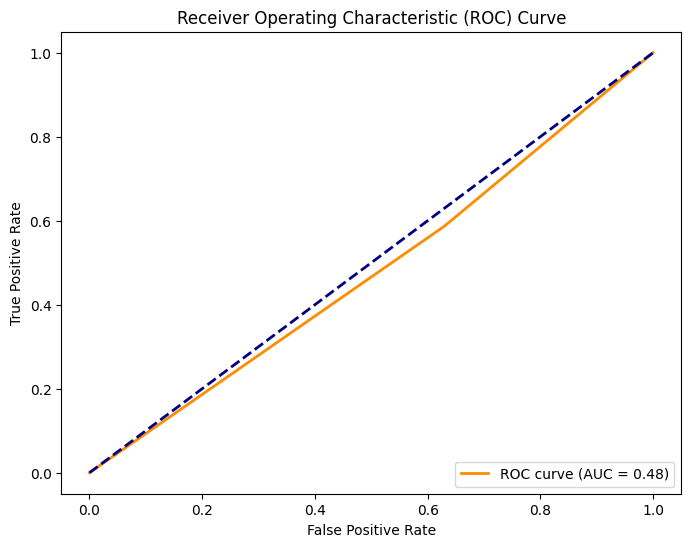

In [43]:
with open('test_prediction.txt', 'r') as file:
    lines = file.readlines()

prediction = []
for line in lines:
    data=line.split()
    prediction.append(int(data[5]))

with open('test.txt', 'r') as file:
    lines = file.readlines()

label = []
for line in lines:
    data=line.split()
    label.append(int(data[5]))

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(label, prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [44]:
# 打開 train.txt 以及 train_aug.txt 作為讀取和寫入文件
with open('train.txt', 'r') as source_file, open('train_aug.txt', 'w') as target_file:
    # 讀取 train.txt 的每一行並將其寫入 train_aug.txt
    for line in source_file:
        data=line.split()
        data[0]=data[0][:-4]+'_tile.jpg'
        data[2]=str(1-float(data[2]))
        target_file.write(' '.join(data))


In [45]:
# 打開 train.txt 以及 train_aug.txt 作為讀取和附加文件
with open('train.txt', 'r') as source_file, open('train_aug.txt', 'a') as target_file:
    # 將 train.txt 的每一行內容附加到 train_aug.txt
    for line in source_file:
        target_file.write(line)


In [46]:
from PIL import Image
import os

# 检查并创建 merged_image_aug 文件夹
folder_name = 'merged_image_aug'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# 遍历 merged_image 文件夹内的所有图片文件
merged_image_folder = 'merged_image'
for filename in os.listdir(merged_image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # 假设图片格式为 jpg 或 png
        # 读取图片
        image_path = os.path.join(merged_image_folder, filename)
        img = Image.open(image_path)

        # 上下翻转图片
        flipped_img = img.transpose(Image.FLIP_TOP_BOTTOM)

        # 创建保存翻转后图片的路径
        save_path = os.path.join(folder_name, f"flipped_{filename}")

        # 保存翻转后的图片到 merged_image_aug 文件夹
        flipped_img.save(save_path)

        # 关闭当前图片
        img.close()
        flipped_img.close()


In [47]:
# 原始图片所在的文件夹路径
source_folder = 'merged_image'

# 目标图片要复制到的文件夹路径
destination_folder = 'merged_image_aug'

import shutil
# 遍历原始图片文件夹，将其中的图片复制到目标文件夹
for filename in os.listdir(source_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # 假设图片格式为 jpg 或 png
        # 构建源文件路径和目标文件路径
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)

        # 复制图片文件
        shutil.copyfile(source_path, destination_path)